In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [8]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [11]:
df.drop("No",axis=1,inplace=True)

In [12]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [13]:
df.duplicated().sum()

0

In [14]:
df.rename(columns={
    "X1 transaction date": "TransactionDate",
    "X2 house age":"House_Age",
    "X3 distance to the nearest MRT station": "DistanceToMRT",
    "X4 number of convenience stores":"NumConvenienceStores",
    "X5 latitude":"Latitude",
    "X6 longitude":"Longitude",
    "Y house price of unit area":"HousePricePerUnit"
}, inplace=True)
df.head()

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [15]:
df.head(4)

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


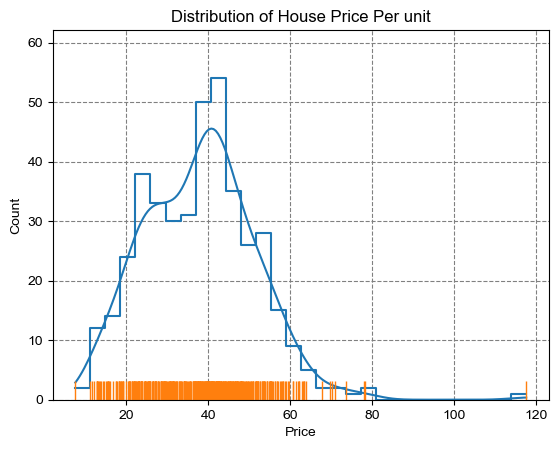

In [16]:
sns.histplot(df.HousePricePerUnit,bins=30,kde=True, element="step",fill=False)
sns.rugplot(df.HousePricePerUnit,height=0.05)
sns.set_style("darkgrid")
plt.grid(color="gray",linestyle="--")
plt.title("Distribution of House Price Per unit")
plt.xlabel("Price")
plt.show()

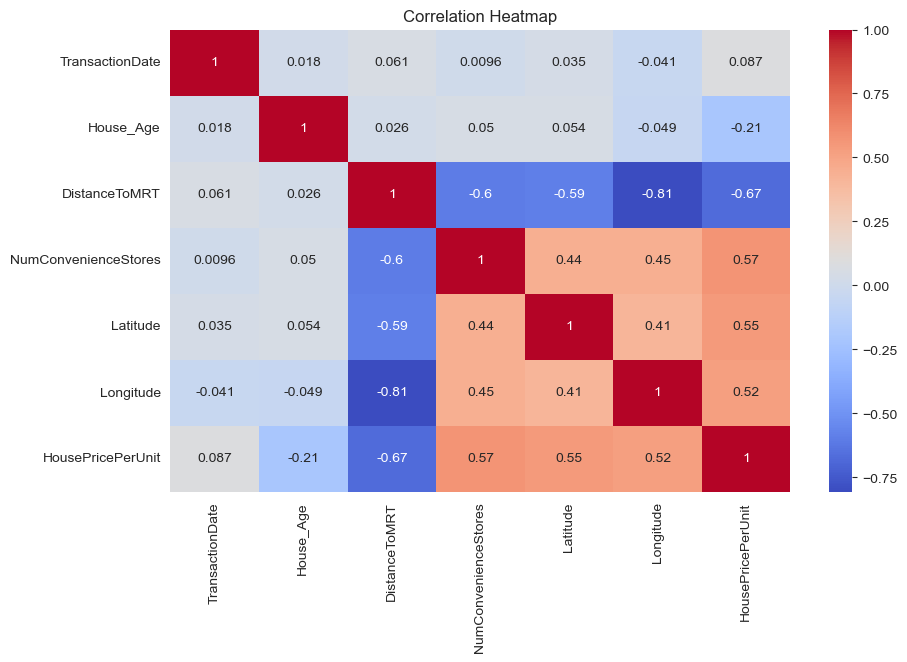

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [18]:
#  Does proximity to MRT stations affect house prices?
correlation_mrt_price=df["DistanceToMRT"].corr(df.HousePricePerUnit)
correlation_mrt_price

-0.6736128553689185

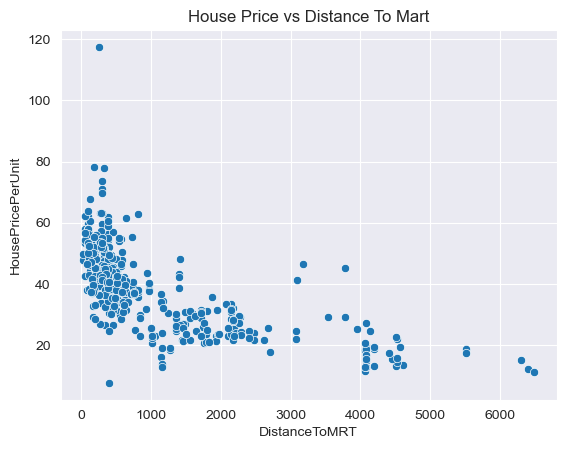

In [19]:
sns.scatterplot(df,x="DistanceToMRT",y="HousePricePerUnit")
plt.title("House Price vs Distance To Mart")
plt.show()

In [20]:
# Is there a correlation between number of convenience stores and house prices
correlation_num_convenience=df["NumConvenienceStores"].corr(df.HousePricePerUnit)
correlation_num_convenience

0.5710049111111483

<Figure size 200x700 with 0 Axes>

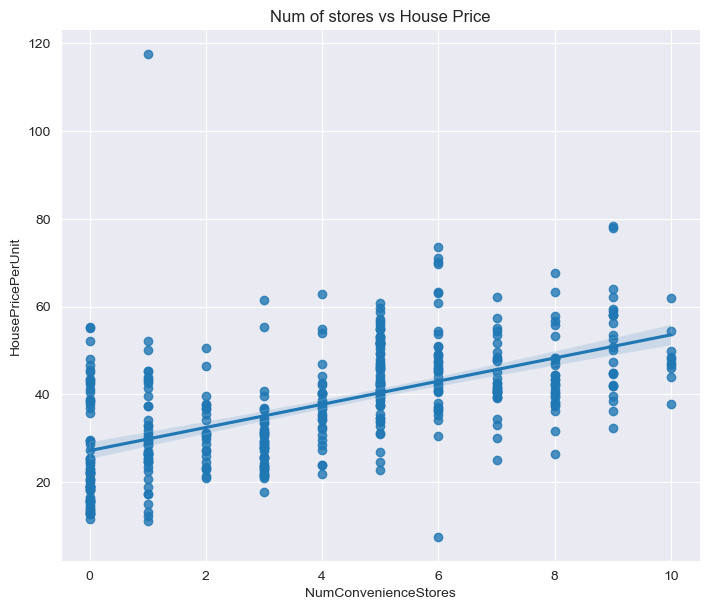

In [58]:
plt.figure(figsize=(2,7))
sns.lmplot(df,x="NumConvenienceStores",y="HousePricePerUnit",height=6, aspect=1.2)
plt.title("Num of stores vs House Price")
plt.show()

In [22]:
# Does house age negatively impact price?
impact_of_price=df["House_Age"].corr(df["HousePricePerUnit"])
impact_of_price

-0.21056704627721692

In [23]:
df

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [24]:
df["TransactionMonth"]=(
  df["TransactionDate"].astype(str).str.split(".").str[1].astype(int)
)
df.head()

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,917
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,917
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,583
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,5
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,833


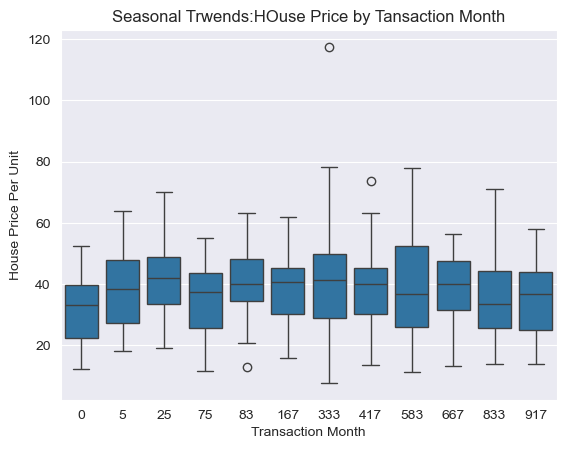

In [25]:
sns.boxplot(data=df,x="TransactionMonth",y="HousePricePerUnit")
plt.title("Seasonal Trwends:HOuse Price by Tansaction Month")
plt.xlabel("Transaction Month")
plt.ylabel("House Price Per Unit")
plt.show()

In [26]:
monthly_avg=df.groupby("TransactionMonth")["HousePricePerUnit"].mean()
print(monthly_avg)

TransactionMonth
0      31.057143
5      38.119149
25     41.293750
75     35.581481
83     40.493478
167    38.304000
333    41.562069
417    38.453448
583    39.604348
667    38.543333
833    35.683871
917    35.557895
Name: HousePricePerUnit, dtype: float64


In [27]:
import datetime
import calendar
def fractional_year_to_date(fractional_year):
    year=int(fractional_year)
    remainder=fractional_year-year
    base=datetime.datetime(year,1,1)
    result_date=base+datetime.timedelta(days=remainder*365)
    return result_date

df["TransactionDateTime"] = df["TransactionDate"].apply(fractional_year_to_date)
df["TransactionMonthName"] = df["TransactionDateTime"].dt.strftime("%B")
df["TransactionMonth"] = df["TransactionDateTime"].dt.month
df.head()

,TransactionDate,House_Age,DistanceToMRT,NumConvenienceStores,Latitude,Longitude,HousePricePerUnit,TransactionMonth,TransactionDateTime,TransactionMonthName
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,11,2012-11-30 16:55:11.999997,November
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,11,2012-11-30 16:55:11.999997,November
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,8,2013-08-01 19:04:48.000003,August
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,7,2013-07-02 12:00:00.000000,July
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,10,2012-10-31 01:04:48.000003,October


In [28]:
monthly_avg_name=df.groupby("TransactionMonthName")["HousePricePerUnit"].mean()
print(monthly_avg_name)

TransactionMonthName
April        41.293750
August       39.003774
January      36.922973
July         38.119149
June         38.453448
March        38.304000
May          41.562069
November     35.557895
October      35.683871
September    35.581481
Name: HousePricePerUnit, dtype: float64
